# Statistical descriptors

As we have seen in class, the statistical descriptors can be broadly classified in to two groups:

* Central tendency
  - Mean
  - Median
  - Mode

* Dispersion
  - Variance
  - Standard deviation
  - Range ( Max - Min ) 

# Measurements of central tendency

Let's understand them graphically, inspecting some distributions:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(10)
data = np.random.gamma(3, scale=1.0, size=10000)
data

array([5.48572926, 4.01355368, 3.8154306 , ..., 6.05657552, 2.60880621,
       2.13027928])

Let's get the distribution of our fake data and see what's the difference between the mean and the median

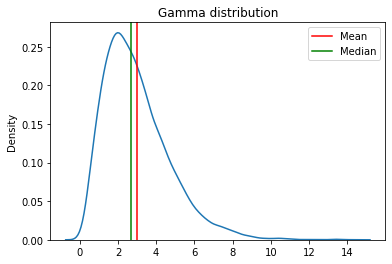

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(data, ax = ax)
plt.axvline(np.mean(data), color='red', label = "Mean")
plt.axvline(np.median(data), color='green', label = "Median")
plt.title("Gamma distribution")
plt.legend();

As you can see, the mean and the median are not the same. In fact, the mean is a bit dangerous value as it's heavily affected by large values, while the median not.

Let's check how it looks like the boxplot of this data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


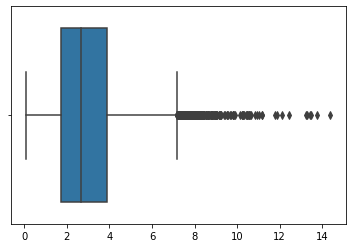

In [ ]:
sns.boxplot(data);

As it can be seen from the previous plot, the are lots of points outside the upper wisker. They could be considered outliers, but as you can see most of them are closely tied. This is a clear indication that you distribution has a long tail as it can be seen in the first figure.

Now let's see how to get the location of those wiskers. For this purpose is better to use a Pandas dataframe instead of a numpy array ( although it can also be done with numpy ). 

First, let's create a Pandas dataframe

In [ ]:
df = pd.DataFrame(data, columns = ["Values"])
df

,Values
0,5.485729
1,4.013554
2,3.815431
3,1.655144
4,3.124169
...,...
9995,1.847186
9996,1.773406
9997,6.056576
9998,2.608806


Now let's use `describe()`

In [ ]:
df.describe()

,Values
count,10000.000000
mean,2.983463
std,1.714065
min,0.077449
25%,1.729027
50%,2.673465
75%,3.908211
max,14.378132


As you must remember for the lecture, to compute the wiskers we need:

* Q1 = 25%
* Q3 = 75%

to compute the IQR ( interquartile range ). Thus,

In [ ]:
Q1 = df.describe()['Values'][4]
Q3 = df.describe()['Values'][6]

IQR = Q3 - Q1
IQR

Lower_wisker = Q1 - 1.5 * IQR
Upper_wisker = Q3 + 1.5 * IQR

print("The Lower wisker is located at: {:.2f}".format(Lower_wisker))
print("The Upper wisker is located at: {:.2f}".format(Upper_wisker))

The Lower wisker is located at: -1.54
The Upper wisker is located at: 7.18


Now let's see what happens with the normal distribution.

In [ ]:
data2 = np.random.normal(loc = 0, scale = 1, size=10000)
data2

array([-0.02338538,  0.36641941,  0.4482348 , ..., -0.05381539,
       -0.46230039,  0.94518102])

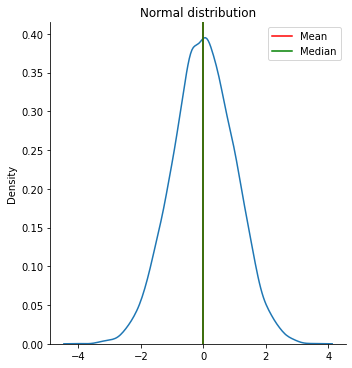

In [ ]:
sns.displot(data2, kind="kde")
plt.axvline(np.mean(data2), color='red', label = "Mean")
plt.axvline(np.median(data2), color='green', label = "Median")
plt.title("Normal distribution")
plt.legend();

# Measurements of dispersion

As you know from the lecture, we have: variance, standard deviation and range.

Let's understand visually what is what. 

Variance tell us how spread are our values. However, the problem with variance is that it comes with squared units, ie:

$$Var=\frac{1}{N}\sum_{i}(x_{i}-\mu)^2$$

basically, how much ( on average ) it deviates every value from the mean of our values $\mu$. 

Thus, is the values are quite similar they will not deviate too much from the mean and the variance will be small. In contrast, if our values are quite different then the variance will grow.

It's important to keep in mind the square, because that makes variance to have the units of our original data squared.

Let's see this graphically.

In [ ]:
data3 = np.random.normal(loc = 0, scale = 3, size=10000)
data4 = np.random.normal(loc = 0, scale = 1, size=10000)

df2 = pd.DataFrame({'Set1': data3,'Set2':data4})
df2

,Set1,Set2
0,-2.660464,-2.216560
1,2.852770,1.310226
2,-0.612469,-1.736004
3,-2.522686,-0.274086
4,3.428005,1.148192
...,...,...
9995,-1.850803,0.665269
9996,-2.163410,-0.301755
9997,3.379564,-1.568151
9998,-5.785946,-1.473192


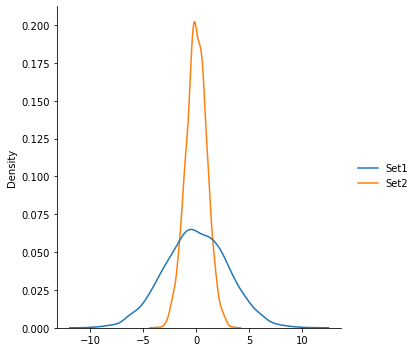

In [ ]:
sns.displot(df2,  kind="kde");

Clearly, in the variance of the first set ( blue ) is bigger than the variance of the second set ( orange ). 

We can compute the variances of each set.

In [ ]:
df2.apply(np.var)

Set1    8.972155
Set2    1.004759
dtype: float64

On the other hand, the standard deviation is basically the root square of the variance, namely:

$$\sigma = \sqrt{\frac{1}{N}\sum_{i}(x_{i}-\mu)^2}$$

as it can be clearly seen, the units of the standard deviation are the same of the original variable `x` because the root square, cancels out the square of the parentheses.

Just to give an example. Imagine that you're analyzing the length of of some pieces produced in a production plant. Then you take a sample of N pieces and you compute the mean lenght: $\mu_{L}$. Then, for each piece of your sample, you compute how different is the length of the piece with respect of the mean length of your sample and square the result. Finally you take the average of those values and you get the variance. 

If you measure the length of your pieces in $cm$, then the units of the variance will be $cm^2$. In contrast, the units of standard deviation will be $cm$